### Import the dataset (from 24th April 2022 to 17 May 2022) 

In [268]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (13, 7)
import pandas as pd
import numpy as np

In [269]:
df = pd.read_csv('curved_labelled_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

### Plotting the dataset 

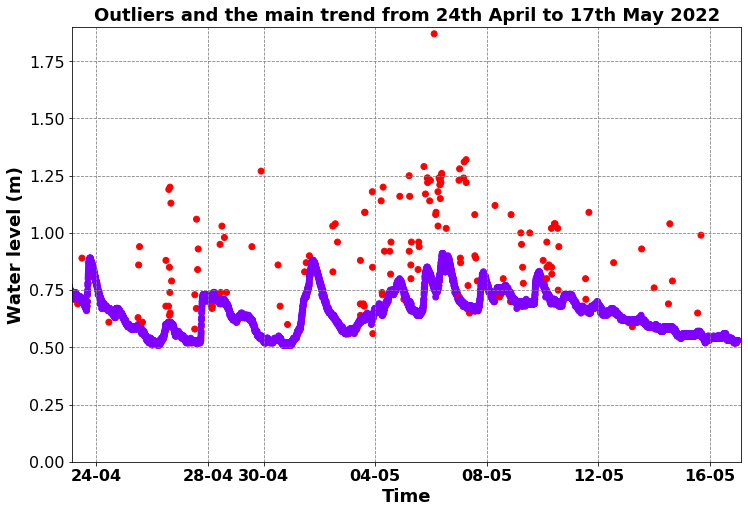

In [270]:
plt.rcParams['figure.figsize'] = (12,8 )
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c= df['data_label'], cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Outliers and the main trend from 24th April to 17th May 2022', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-24 00:00:00'],['2022-05-17 23:59:59'])
ax.set_ylim(0, 1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")

plt.show()

#### z-scores

In [271]:
import datetime as datetime
from scipy import stats
water_level = np.array(df['height']).reshape(-1, 1)

#### z-scores

In [272]:
length = np.array(df.height)
water_arrays = np.array_split(length, 100)
len(length)

6712

In [273]:
lower_limit = df.height.mean() - df.height.std()
upper_limit = df.height.mean() + df.height.std()
upper_limit

0.7608538861844103

### z-score

In [274]:
sup_list = []
for array in water_arrays:
    z_labels = stats.zscore(array)
    sup_list.append(z_labels)
#print(sup_list)

In [275]:
l = []
for i in sup_list:
    for ii in i.tolist():
        l.append(ii)        
#print(l)

In [276]:
zs_labels = l
df['zs_labels'] = zs_labels
df.to_csv ('zs_output_curved.csv', header=True,index = False)

In [277]:
thresh = 2
zs_list = list(df['zs_labels'])
clusters =[]
for i in zs_list:
    if i > thresh:
        cluster =1 
    else:
        cluster = 0
    clusters.append(cluster) 
    p = clusters

In [278]:
df['zs_labels'] = p

In [279]:
df.to_csv ('zs_metric_curved.csv', header=True,index = False)

In [280]:
temp_df = df.loc[(df['zs_labels'] == 0)]
df3 = temp_df.set_index('time')
df4 = df3.reset_index()

In [281]:
temp_df1 = df.loc[(df['zs_labels'] == 1)]
df5 = temp_df1.set_index('time')
df6 = df5.reset_index()

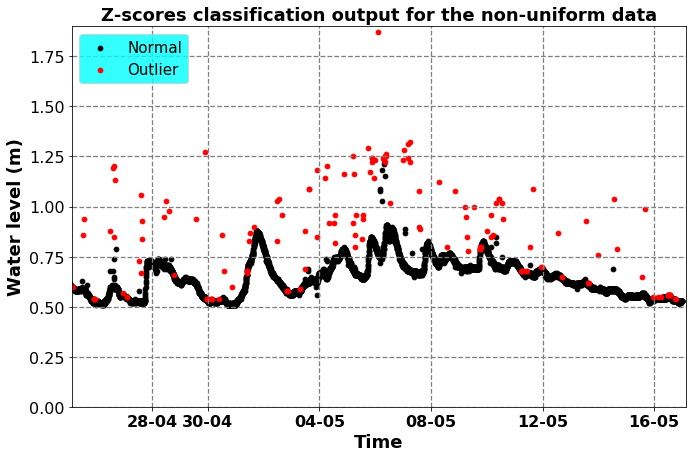

In [282]:
plt.rcParams['figure.figsize'] = (11, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4['time'],df4['height'], c ="black", marker="o", s = 10**1.35)
Outlier = ax.scatter(df6['time'],df6['height'], c ="red",marker ="o", s = 10**1.35)
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.3)
ax.set_title('Z-scores classification output for the non-uniform data', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-26 00:00:01'],['2022-05-17 23:59:59'])
ax.set_ylim(0,1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('zs_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Model metrics

In [283]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
data_labels = list(df['data_label'])
zs_label = list(df['zs_labels'])

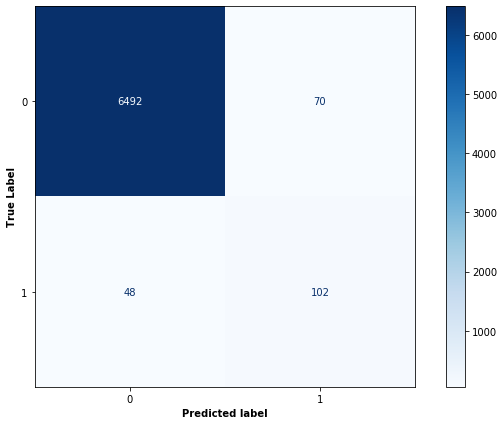

In [284]:
c_matrix = confusion_matrix (data_labels,zs_label)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [285]:
data_accuracy = accuracy_score (data_labels,zs_label)
data_accuracy

0.982419547079857

In [286]:
data_precision = precision_score (data_labels,zs_label)
data_precision

0.5930232558139535

In [287]:
data_recall_score = recall_score (data_labels,zs_label)
data_recall_score

0.68

In [288]:
data_f1_score = f1_score (data_labels,zs_label)
data_f1_score

0.6335403726708074